In [ ]:
from google.colab import drive

drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
!pip install fastaudio
!pip install fastai==2.5.2
!pip install matplotlib==3.2.2
!pip install scikit-learn==1.0.2

     |████████████████████████████████| 183 kB 7.2 MB/s 
     |████████████████████████████████| 53 kB 2.2 MB/s 
     |████████████████████████████████| 194 kB 44.0 MB/s 
     |████████████████████████████████| 1.9 MB 44.3 MB/s 
     |████████████████████████████████| 804.1 MB 2.9 kB/s 
     |████████████████████████████████| 23.3 MB 60.0 MB/s 
     |████████████████████████████████| 23.3 MB 1.3 MB/s 
     |████████████████████████████████| 22.1 MB 1.4 MB/s 
     |████████████████████████████████| 22.1 MB 1.4 MB/s 
     |████████████████████████████████| 17.4 MB 265 kB/s 
  Created wheel for librosa: filename=librosa-0.8.0-py3-none-any.whl size=201396 sha256=89f4325285aa5b4365d490fde2620c0e302e1f5b6c44d5e247119379f7f7e13d
  Stored in directory: /root/.cache/pip/wheels/de/1e/aa/d91797ae7e1ce11853ee100bee9d1781ae9d750e7458c95afb
  Created wheel for colorednoise: filename=colorednoise-1.1.1-py3-none-any.whl size=3983 sha256=8bc0f711a18beb44345dfce368a6c387371c1584585aa6f1a830290848255c63


In [ ]:
from fastai.vision.all import *
from fastaudio.core.all import *
from fastaudio.augment.all import *
from fastaudio.ci import skip_if_ci

/usr/local/lib/python3.7/dist-packages/torchaudio/backend/utils.py:47: UserWarning: "torchaudio.USE_SOUNDFILE_LEGACY_INTERFACE" flag is deprecated and will be removed in 0.9.0. Please remove the use of flag.
  '"torchaudio.USE_SOUNDFILE_LEGACY_INTERFACE" flag is deprecated and will be removed in 0.9.0. '


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import*
from imblearn.metrics import specificity_score

In [ ]:
# import os
# import sys
# import subprocess
# import numpy as np
# import glob
# import json
# import pandas as pd

# '''
# This script creates a folder "Extracted_data" inside which it extracts all the wav files in the directories date-wise
# '''

# coswara_data_dir = os.path.abspath('/content/gdrive/MyDrive/thesisDatasets/Coswara/github/') # Local Path of iiscleap/Coswara-Data Repo
# extracted_data_dir = os.path.join('/content/gdrive/MyDrive/thesisDatasets/Coswara/', 'Extracted_data')  

# if not os.path.exists(coswara_data_dir):
#     raise("Check the Coswara dataset directory!")

# if not os.path.exists(extracted_data_dir):
#     os.makedirs(extracted_data_dir) # Creates the Extracted_data folder if it doesn't exist

# dirs_extracted = set(map(os.path.basename,glob.glob('{}/202*'.format(extracted_data_dir))))
# dirs_all = set(map(os.path.basename,glob.glob('{}/202*'.format(coswara_data_dir))))

# dirs_to_extract = list(set(dirs_all) - dirs_extracted)

# for d in dirs_to_extract:
#     p = subprocess.Popen('cat {}/{}/*.tar.gz.* |tar -xvz -C {}/'.format(coswara_data_dir, d, extracted_data_dir), shell=True)
#     p.wait()


# print("Extraction process complete!")

# Preprocessing

In [ ]:
COS_loc = "/content/gdrive/MyDrive/thesisDatasets/Coswara/"
COS_data = "/content/gdrive/MyDrive/thesisDatasets/Coswara/Extracted_data/"

In [ ]:
cos_df = pd.read_csv('/content/gdrive/MyDrive/thesisDatasets/Coswara/github/combined_data.csv')
cos_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2233 entries, 0 to 2232
Data columns (total 36 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               2233 non-null   object 
 1   a                2233 non-null   int64  
 2   covid_status     2233 non-null   object 
 3   record_date      2233 non-null   object 
 4   ep               2233 non-null   object 
 5   g                2233 non-null   object 
 6   l_c              2233 non-null   object 
 7   l_l              1994 non-null   object 
 8   l_s              2233 non-null   object 
 9   rU               1553 non-null   object 
 10  smoker           573 non-null    object 
 11  cold             291 non-null    object 
 12  ht               183 non-null    object 
 13  diabetes         191 non-null    object 
 14  cough            385 non-null    object 
 15  ctDate           134 non-null    object 
 16  ctScan           450 non-null    object 
 17  ctScore       

In [ ]:
cos_df = cos_df[["id", "covid_status", "test_status", "others_resp", "asthma",  "pneumonia", "cld"]]
cos_df[:5]

,id,covid_status,test_status,others_resp,asthma,pneumonia,cld
0,iV3Db6t1T8b7c5HQY2TwxIhjbzD3,healthy,NaN,NaN,NaN,NaN,NaN
1,AxuYWBN0jFVLINCBqIW5aZmGCdu1,healthy,NaN,NaN,NaN,NaN,NaN
2,C5eIsssb9GSkaAgIfsHMHeR6fSh1,healthy,NaN,NaN,NaN,NaN,NaN
3,YjbEAECMBIaZKyfqOvWy5DDImUb2,healthy,NaN,NaN,NaN,NaN,NaN
4,aGOvk4ji0cVqIzCs1jHnzlw2UEy2,healthy,NaN,NaN,NaN,NaN,NaN


([0, 1, 2, 3, 4, 5, 6], <a list of 7 Text major ticklabel objects>)

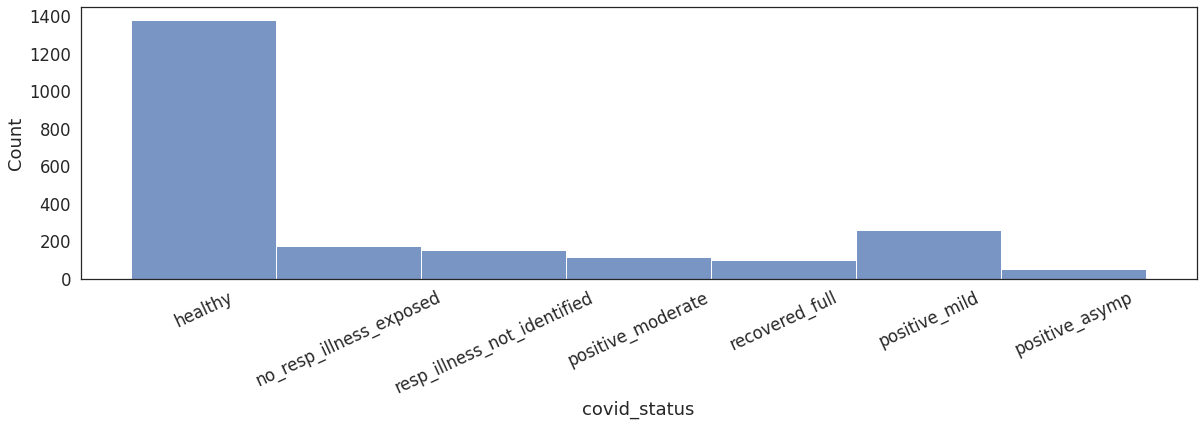

In [ ]:
plt.figure(figsize=(20,5))
sns.set(style='white', font_scale = 1.5)
sns.histplot(cos_df['covid_status'])
plt.xticks(rotation=25)

In [ ]:
# only covid positive & no respiratory problems samples

cos_covid = cos_df[( (cos_df.covid_status == 'positive_mild') 
                    | (cos_df.covid_status=='positive_asymp')
                    | (cos_df.covid_status =='positive_moderate') ) 
                  ]

#cos_covid.to_csv('cos_covid.csv')

print('SAMPLES: -->',len(cos_covid))
cos_covid.info()
cos_covid[:5]

SAMPLES: --> 430
<class 'pandas.core.frame.DataFrame'>
Int64Index: 430 entries, 28 to 2232
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            430 non-null    object
 1   covid_status  430 non-null    object
 2   test_status   335 non-null    object
 3   others_resp   10 non-null     object
 4   asthma        9 non-null      object
 5   pneumonia     12 non-null     object
 6   cld           4 non-null      object
dtypes: object(7)
memory usage: 26.9+ KB


,id,covid_status,test_status,others_resp,asthma,pneumonia,cld
28,9hXEs9OejdVxG6JJGCyKQpqVvy43,positive_moderate,p,NaN,NaN,NaN,NaN
33,XbOUJCUl8GWEpQpIRMvujDE1sTE2,positive_moderate,p,NaN,NaN,NaN,NaN
34,Qcliznd3z1VdWmJOZh9nvlstTYv1,positive_moderate,p,NaN,NaN,NaN,NaN
36,AutXsDVtEcVH9ZQ58NqDunDcqZv1,positive_mild,p,True,NaN,NaN,NaN
37,dFtGnzYqh1NVAwQUQ3wkysqAe3n1,positive_asymp,p,NaN,NaN,NaN,NaN


In [ ]:
# covid healthy & no respiratory problems samples (1359 + 170)

cos_healthy = cos_df[( (cos_df.covid_status == "healthy") 
                      | (cos_df.covid_status == "no_resp_illness_exposed") )
                    ]

#cos_healthy.to_csv('cos_healthy.csv')

print('SAMPLES: -->',len(cos_healthy))
cos_healthy.info()
cos_healthy[:5]

SAMPLES: --> 1553
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1553 entries, 0 to 2226
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1553 non-null   object
 1   covid_status  1553 non-null   object
 2   test_status   331 non-null    object
 3   others_resp   1 non-null      object
 4   asthma        22 non-null     object
 5   pneumonia     0 non-null      object
 6   cld           1 non-null      object
dtypes: object(7)
memory usage: 97.1+ KB


,id,covid_status,test_status,others_resp,asthma,pneumonia,cld
0,iV3Db6t1T8b7c5HQY2TwxIhjbzD3,healthy,NaN,NaN,NaN,NaN,NaN
1,AxuYWBN0jFVLINCBqIW5aZmGCdu1,healthy,NaN,NaN,NaN,NaN,NaN
2,C5eIsssb9GSkaAgIfsHMHeR6fSh1,healthy,NaN,NaN,NaN,NaN,NaN
3,YjbEAECMBIaZKyfqOvWy5DDImUb2,healthy,NaN,NaN,NaN,NaN,NaN
4,aGOvk4ji0cVqIzCs1jHnzlw2UEy2,healthy,NaN,NaN,NaN,NaN,NaN


In [ ]:
# loads all file paths from location

cos_files = get_files(
  path = COS_data,
  extensions = '.wav',
  recurse = True
)

cos_files

(#19636) [Path('/content/gdrive/MyDrive/thesisDatasets/Coswara/Extracted_data/20200430/xa2v8z3Yzgb9dFrq2gEZz6oS7fh1/vowel-e.wav'),Path('/content/gdrive/MyDrive/thesisDatasets/Coswara/Extracted_data/20200430/xa2v8z3Yzgb9dFrq2gEZz6oS7fh1/counting-fast.wav'),Path('/content/gdrive/MyDrive/thesisDatasets/Coswara/Extracted_data/20200430/xa2v8z3Yzgb9dFrq2gEZz6oS7fh1/vowel-a.wav'),Path('/content/gdrive/MyDrive/thesisDatasets/Coswara/Extracted_data/20200430/xa2v8z3Yzgb9dFrq2gEZz6oS7fh1/cough-heavy.wav'),Path('/content/gdrive/MyDrive/thesisDatasets/Coswara/Extracted_data/20200430/xa2v8z3Yzgb9dFrq2gEZz6oS7fh1/vowel-o.wav'),Path('/content/gdrive/MyDrive/thesisDatasets/Coswara/Extracted_data/20200430/xa2v8z3Yzgb9dFrq2gEZz6oS7fh1/cough-shallow.wav'),Path('/content/gdrive/MyDrive/thesisDatasets/Coswara/Extracted_data/20200430/xa2v8z3Yzgb9dFrq2gEZz6oS7fh1/counting-normal.wav'),Path('/content/gdrive/MyDrive/thesisDatasets/Coswara/Extracted_data/20200430/xa2v8z3Yzgb9dFrq2gEZz6oS7fh1/breathing-deep.wav')

In [ ]:
# method to get file paths

def getit(id):
    for i in cos_files:
        folders = str(i).split("/")
        if folders[-1] == 'cough-heavy.wav':
            if folders[-2] == id:
                #print(str(i))
                return str(i)

getit(cos_covid.id.values[0]) 

'/content/gdrive/MyDrive/thesisDatasets/Coswara/Extracted_data/20210816/9hXEs9OejdVxG6JJGCyKQpqVvy43/cough-heavy.wav'

In [ ]:
# save every audio files and the corresponding label in list

file_names = []
labels = []

for i in cos_covid.id.values:
    file_names.append(getit(i))
    labels.append('COVID POSITIVE')

for i in cos_healthy.id.values:
    file_names.append(getit(i))
    labels.append('COVID NEGATIVE')
    
print(file_names[:3])
print(labels[:3])

Counter(labels)

['/content/gdrive/MyDrive/thesisDatasets/Coswara/Extracted_data/20210816/9hXEs9OejdVxG6JJGCyKQpqVvy43/cough-heavy.wav', '/content/gdrive/MyDrive/thesisDatasets/Coswara/Extracted_data/20210816/XbOUJCUl8GWEpQpIRMvujDE1sTE2/cough-heavy.wav', '/content/gdrive/MyDrive/thesisDatasets/Coswara/Extracted_data/20210816/Qcliznd3z1VdWmJOZh9nvlstTYv1/cough-heavy.wav']
['COVID POSITIVE', 'COVID POSITIVE', 'COVID POSITIVE']


Counter({'COVID NEGATIVE': 1553, 'COVID POSITIVE': 430})

In [ ]:
# dataframe for dataloader

df = pd.DataFrame({'filename' : file_names, 'category': labels})
three_df = df.copy()
three_df

,filename,category
0,/content/gdrive/MyDrive/thesisDatasets/Coswara/Extracted_data/20210816/9hXEs9OejdVxG6JJGCyKQpqVvy43/cough-heavy.wav,COVID POSITIVE
1,/content/gdrive/MyDrive/thesisDatasets/Coswara/Extracted_data/20210816/XbOUJCUl8GWEpQpIRMvujDE1sTE2/cough-heavy.wav,COVID POSITIVE
2,/content/gdrive/MyDrive/thesisDatasets/Coswara/Extracted_data/20210816/Qcliznd3z1VdWmJOZh9nvlstTYv1/cough-heavy.wav,COVID POSITIVE
3,/content/gdrive/MyDrive/thesisDatasets/Coswara/Extracted_data/20210816/AutXsDVtEcVH9ZQ58NqDunDcqZv1/cough-heavy.wav,COVID POSITIVE
4,/content/gdrive/MyDrive/thesisDatasets/Coswara/Extracted_data/20210816/dFtGnzYqh1NVAwQUQ3wkysqAe3n1/cough-heavy.wav,COVID POSITIVE
...,...,...
1978,/content/gdrive/MyDrive/thesisDatasets/Coswara/Extracted_data/20210714/tfZUfOLuABObiYEbvQPmySozHfg2/cough-heavy.wav,COVID NEGATIVE
1979,/content/gdrive/MyDrive/thesisDatasets/Coswara/Extracted_data/20210714/YXt9ERhtqqhCsrni0y61UNue3Yy2/cough-heavy.wav,COVID NEGATIVE
1980,/content/gdrive/MyDrive/thesisDatasets/Coswara/Extracted_data/20210714/gGgG540lBOZoSK1vyqNVlqBzQBl1/cough-heavy.wav,COVID NEGATIVE
1981,/content/gdrive/MyDrive/thesisDatasets/Coswara/Extracted_data/20210714/nx6RCgD0OjdzLa07UHBdHfz54ML2/cough-heavy.wav,COVID NEGATIVE


In [ ]:
# # check audio files samplerate

# sr_list = []

# for i in three_df.filename.values:
#     sr_list.append(librosa.get_samplerate(i))
    
# sr_list = np.array(sr_list)

# values, counts = np.unique(sr_list, return_counts=True)
# print(values, counts)

# # check duration of each files

# dur_list = []
# failed_list = []
# for i in three_df.filename.values:
#     try:
#         y, sr = librosa.load(i)
#         dur_list.append(librosa.get_duration(y=y, sr=sr))
#     except:
#         failed_list.append(i)
#         pass
    
# dur_list = np.array(dur_list)

# print(np.mean(dur_list))
# print(np.average(dur_list))

# # files failed to load
# print(failed_list[:3])
# len(failed_list)

# # remove corrupted files
# for i in failed_list:
#     print(i)
#     three_df.drop(three_df[three_df.filename == i].index, inplace=True)
# three_df

In [ ]:
three_df = three_df.dropna()

COVID NEGATIVE    1527
COVID POSITIVE     418
Name: category, dtype: int64

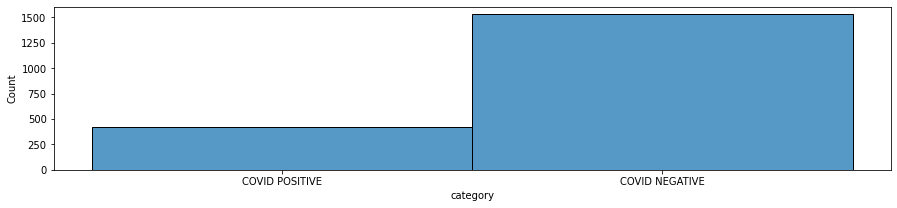

In [ ]:
# check class distribution
plt.figure(figsize=(15,3))
sns.histplot(three_df['category'])

three_df['category'].value_counts()

In [ ]:
three_df.to_csv(COS_data+'coswara_df_2class.csv', index=False) 

# Mel-Spectrogram and Augmentation

In [ ]:
# resize audio to a uniform length and create mel-spectrogram from audio

cfg = AudioConfig.BasicMelSpectrogram(sample_rate=22050, n_fft=1024, hop_length=512, f_min=0.0, f_max=4000,
                                      n_mels=64, normalized=False, norm=None, mel=True, to_db=True)

crop6s = ResizeSignal(duration=6000)
a2s = AudioToSpec.from_cfg(cfg)
SGR = SGRoll(max_shift_pct=0.5, direction=0)
MT = MaskTime(size=5)
MF =  MaskFreq(size=5)

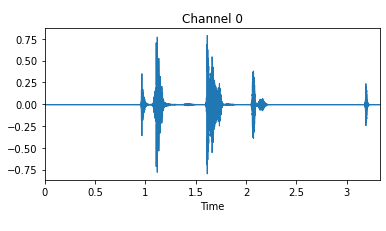

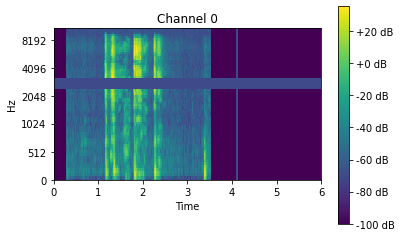

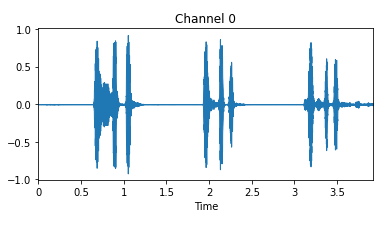

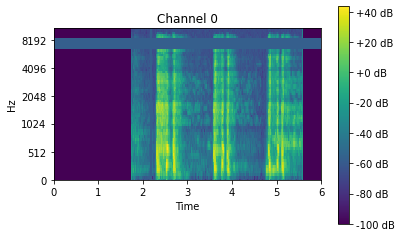

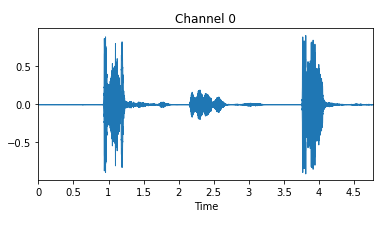

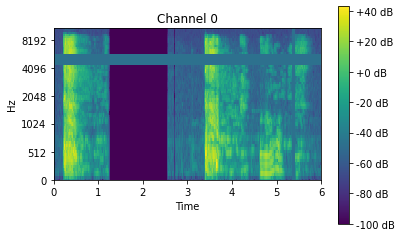

In [ ]:
# check transformations
pipe = Pipeline([AudioTensor.create, crop6s, a2s, SGR, MT, MF])

for fn in three_df.filename.values[42:45]:
      audio = AudioTensor.create(fn)
      audio.show()
      pipe(fn).show()

## Dataloader

In [ ]:
three_df, three_df_test = train_test_split(three_df, test_size=0.15, random_state=69, stratify=three_df.category.values)

In [ ]:
print(three_df.category.value_counts())
print(three_df_test.category.value_counts())

COVID NEGATIVE    1298
COVID POSITIVE     355
Name: category, dtype: int64
COVID NEGATIVE    229
COVID POSITIVE     63
Name: category, dtype: int64


Setting-up type transforms pipelines
1524  /content/gdrive/MyDrive/thesisDatasets/Coswara/Extracted_data/20200416/KOKCooQejva2hnY3f1LnxqL4gUR2/cough-heavy.wav  COVID NEGATIVE
863   /content/gdrive/MyDrive/thesisDatasets/Coswara/Extracted_data/20200417/jzZNRqxGsTXZVZJbipHEyBaGPAI2/cough-heavy.wav  COVID NEGATIVE
769   /content/gdrive/MyDrive/thesisDatasets/Coswara/Extracted_data/20200417/Pjs0FDjZUofs8mvB3cjg0Hibe8B2/cough-heavy.wav  COVID NEGATIVE
1911  /content/gdrive/MyDrive/thesisDatasets/Coswara/Extracted_data/20210426/woCTR97MfJMTanmngUpcK1IJsvm1/cough-heavy.wav  COVID NEGATIVE
1520  /content/gdrive/MyDrive/thesisDatasets/Coswara/Extracted_data/20200416/A6cnzNlOAmM8GCpUKtC1ZwTKUiO2/cough-heavy.wav  COVID NEGATIVE
...                                                                                                                   ...             ...
84    /content/gdrive/MyDrive/thesisDatasets/Coswara/Extracted_data/20200820/9Wkd6QJdpBNEosMpzYhFwZjBJX92/cough-heavy.wav  COVID POSITI

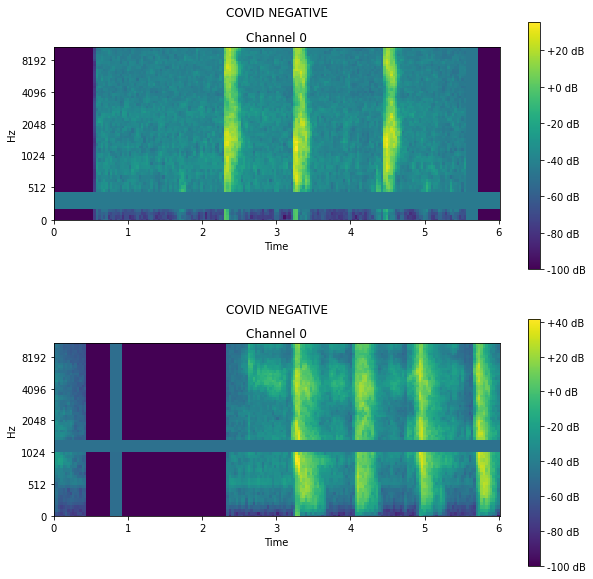

In [ ]:
item_tfms = [crop6s, a2s, SGR, MT, MF]

auds = DataBlock(blocks = (AudioBlock, CategoryBlock),  
                 get_x = ColReader("filename"),
                 splitter = TrainTestSplitter(test_size=0.15, random_state=69, 
                                              stratify=three_df.category.values),
                 item_tfms = item_tfms,
                 get_y = ColReader("category"))


auds.summary(three_df, show_batch=True, figsize=(10, 10))

## Check data distribution

In [ ]:
dls_noweight = auds.dataloaders(three_df, bs=32)

for i in range(10):
    x,y = dls_noweight.one_batch()
    print(np.unique(y.cpu(), return_counts=True))

print(dls_noweight.train.items.category.value_counts())
print(dls_noweight.valid.items.category.value_counts())

(array([0, 1]), array([26,  6]))
(array([0, 1]), array([25,  7]))
(array([0, 1]), array([28,  4]))
(array([0, 1]), array([24,  8]))
(array([0, 1]), array([27,  5]))
(array([0, 1]), array([23,  9]))
(array([0, 1]), array([24,  8]))
(array([0, 1]), array([29,  3]))
(array([0, 1]), array([25,  7]))
(array([0, 1]), array([24,  8]))
COVID NEGATIVE    1103
COVID POSITIVE     302
Name: category, dtype: int64
COVID NEGATIVE    195
COVID POSITIVE     53
Name: category, dtype: int64


## Weighted dataloaders

In [ ]:
dsets = auds.datasets(three_df)

count = Counter(three_df.category.values)
wgts = [1/count[dsets.vocab[label]] for cat, label in dsets.train]
wgts[:10]
np.unique(np.array(wgts), return_counts=True)

In [ ]:
dls = auds.dataloaders(three_df, bs=32, dl_type=WeightedDL, wgts=wgts)

for i in range(10):
    x,y = dls.one_batch()
    print(np.unique(y.cpu(), return_counts=True))

dls.train.show_batch(max_n=5, nrows=5, unique=True, figsize=(5, 15))

In [ ]:
test_dl = dls.test_dl(three_df_test, with_labels=True)

In [ ]:
print(dls.train.items.category.value_counts())
print(dls.valid.items.category.value_counts())
print(test_dl.items.category.value_counts())

COVID NEGATIVE    1103
COVID POSITIVE     302
Name: category, dtype: int64
COVID NEGATIVE    195
COVID POSITIVE     53
Name: category, dtype: int64
COVID NEGATIVE    229
COVID POSITIVE     63
Name: category, dtype: int64


# Models: Fine-tuning

### ResNet-18

epoch,train_loss,valid_loss,accuracy,roc_auc_score,time
0,1.167503,1.082230,0.580645,0.563909,00:22


Better model found at epoch 0 with accuracy value: 0.5806451439857483.


epoch,train_loss,valid_loss,accuracy,roc_auc_score,time
0,1.104862,0.896035,0.616935,0.638075,00:22
1,1.060589,0.822390,0.588710,0.648718,00:22
2,0.985416,0.888294,0.572581,0.605467,00:22
3,0.907103,0.824713,0.596774,0.625689,00:22
4,0.901520,0.841151,0.580645,0.619981,00:22
5,0.877447,0.764977,0.592742,0.688292,00:22
6,0.844721,0.669146,0.713710,0.703000,00:22
7,0.825343,0.597587,0.745968,0.725593,00:22
8,0.818805,0.737435,0.616935,0.662941,00:22
9,0.790302,0.843515,0.596774,0.634301,00:22


Better model found at epoch 0 with accuracy value: 0.6169354915618896.
Better model found at epoch 6 with accuracy value: 0.7137096524238586.
Better model found at epoch 7 with accuracy value: 0.7459677457809448.
Better model found at epoch 21 with accuracy value: 0.774193525314331.
Better model found at epoch 23 with accuracy value: 0.8185483813285828.


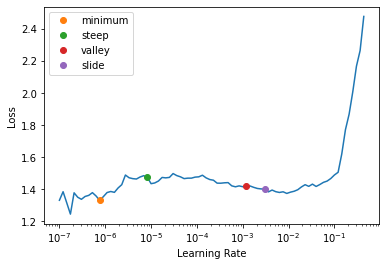

In [ ]:
# resnet 18 model
learn = cnn_learner(dls, resnet18, # <- model
                    n_in=1,  # <- This is the only audio specific modification here
                    metrics=[accuracy, RocAucBinary(average='macro')],
                    cbs=(SaveModelCallback(monitor='accuracy', with_opt=True))
                   )

# Find Learning Rate
lrs = learn.lr_find(suggest_funcs=(minimum, steep, valley, slide))

# Run 
learn.fine_tune(50, lrs.valley)

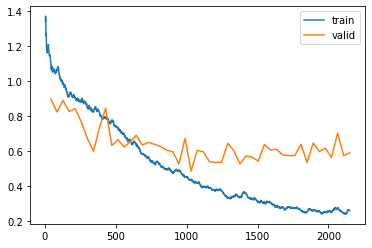

In [ ]:
learn.recorder.plot_loss()

0.7465753424657534 0.75455742704651 0.6557262124784908 0.6715879947320995 0.6715879947320995 0.6471147560468296
^^    accuracy, rocauc, f1, recall, specificity, precision    ^^
              precision    recall  f1-score   support

           0       0.86      0.80      0.83       229
           1       0.43      0.54      0.48        63

    accuracy                           0.75       292
   macro avg       0.65      0.67      0.66       292
weighted avg       0.77      0.75      0.76       292



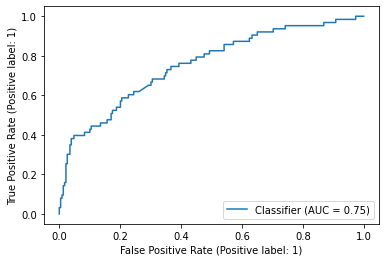

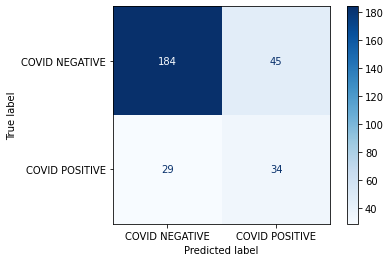

In [ ]:
xx = learn.load('/content/models/model')

pred_probas, actual_classes, pred_classes = xx.get_preds(dl=test_dl, with_decoded=True)

acc = accuracy_score(actual_classes, pred_classes)
rocauc = roc_auc_score(actual_classes, pred_probas[:, 1], average='macro')
fone= f1_score(actual_classes, pred_classes, average='macro')
rec = recall_score(actual_classes, pred_classes, average='macro')
prec = precision_score(actual_classes, pred_classes, average='macro')
spc = specificity_score(actual_classes, pred_classes, average='macro')


print(acc, rocauc, fone, rec, spc, prec)
print('^^    accuracy, rocauc, f1, recall, specificity, precision    ^^')

print(classification_report(actual_classes, pred_classes))       
RocCurveDisplay.from_predictions(actual_classes, pred_probas[:, 1])
plt.show()

ConfusionMatrixDisplay.from_predictions(actual_classes, pred_classes, 
                                        display_labels=test_dl.vocab,cmap=plt.cm.Blues)
plt.show()

### ResNet-34

epoch,train_loss,valid_loss,accuracy,roc_auc_score,time
0,1.185695,0.836482,0.560484,0.654427,00:23


Better model found at epoch 0 with accuracy value: 0.5604838728904724.


epoch,train_loss,valid_loss,accuracy,roc_auc_score,time
0,1.041498,0.798297,0.612903,0.659652,00:23
1,0.999999,0.836857,0.629032,0.612046,00:23
2,1.020010,0.780175,0.625000,0.627141,00:23
3,0.987975,0.690678,0.681452,0.740493,00:22
4,0.960083,0.917493,0.580645,0.633333,00:23
5,0.917153,0.713903,0.697581,0.695259,00:23
6,0.910287,0.748563,0.645161,0.692356,00:23
7,0.884700,0.694042,0.709677,0.704161,00:23
8,0.884224,0.811223,0.596774,0.654765,00:23
9,0.825576,0.805436,0.645161,0.686357,00:23


Better model found at epoch 0 with accuracy value: 0.6129032373428345.
Better model found at epoch 1 with accuracy value: 0.6290322542190552.
Better model found at epoch 3 with accuracy value: 0.6814516186714172.
Better model found at epoch 5 with accuracy value: 0.6975806355476379.
Better model found at epoch 7 with accuracy value: 0.7096773982048035.
Better model found at epoch 15 with accuracy value: 0.7338709831237793.
Better model found at epoch 19 with accuracy value: 0.7459677457809448.
Better model found at epoch 24 with accuracy value: 0.7943548560142517.


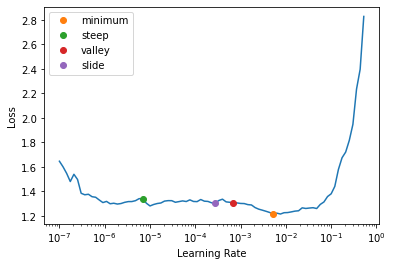

In [ ]:
learn = cnn_learner(dls, resnet34, # <- model
                    n_in=1,  # <- This is the only audio specific modification here
                    metrics=[accuracy, RocAucBinary(average='macro')],
                    cbs=(SaveModelCallback(monitor='accuracy', with_opt=True))
                   )

# Find Learning Rate
lrs = learn.lr_find(suggest_funcs=(minimum, steep, valley, slide))

# Run 
learn.fine_tune(50, lrs.valley)

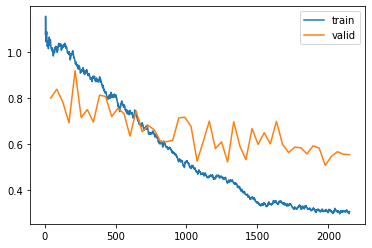

In [ ]:
learn.recorder.plot_loss()

0.7636986301369864 0.7928883343730505 0.691846504443051 0.7227767380605808 0.7227767380605808 0.6790329768270945
^^    accuracy, rocauc, f1, recall, specificity, precision    ^^
              precision    recall  f1-score   support

           0       0.89      0.79      0.84       229
           1       0.47      0.65      0.54        63

    accuracy                           0.76       292
   macro avg       0.68      0.72      0.69       292
weighted avg       0.80      0.76      0.78       292



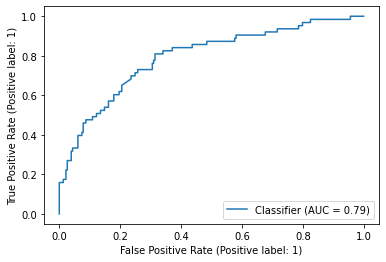

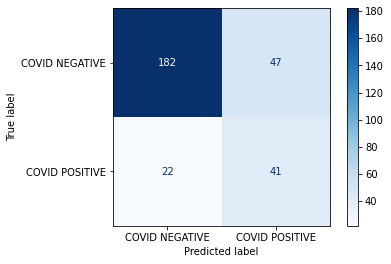

In [ ]:
xx = learn.load('/content/models/model')

pred_probas, actual_classes, pred_classes = xx.get_preds(dl=test_dl, with_decoded=True)

acc = accuracy_score(actual_classes, pred_classes)
rocauc = roc_auc_score(actual_classes, pred_probas[:, 1], average='macro')
fone= f1_score(actual_classes, pred_classes, average='macro')
rec = recall_score(actual_classes, pred_classes, average='macro')
prec = precision_score(actual_classes, pred_classes, average='macro')
spc = specificity_score(actual_classes, pred_classes, average='macro')


print(acc, rocauc, fone, rec, spc, prec)
print('^^    accuracy, rocauc, f1, recall, specificity, precision    ^^')

print(classification_report(actual_classes, pred_classes))       
RocCurveDisplay.from_predictions(actual_classes, pred_probas[:, 1])
plt.show()

ConfusionMatrixDisplay.from_predictions(actual_classes, pred_classes, 
                                        display_labels=test_dl.vocab,cmap=plt.cm.Blues)
plt.show()

### ResNet-50

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/hub/checkpoints/resnet50-19c8e357.pth


  0%|          | 0.00/97.8M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,accuracy,roc_auc_score,time
0,1.212688,0.894819,0.568548,0.631108,00:23


Better model found at epoch 0 with accuracy value: 0.5685483813285828.


epoch,train_loss,valid_loss,accuracy,roc_auc_score,time
0,1.089413,0.834987,0.620968,0.649589,00:23
1,1.050519,0.811511,0.637097,0.644848,00:23
2,1.055690,0.853771,0.641129,0.625206,00:23
3,1.062461,0.724387,0.673387,0.682342,00:24
4,1.067320,0.771637,0.645161,0.646783,00:23
5,1.034897,0.893826,0.592742,0.583890,00:23
6,1.025031,0.756872,0.681452,0.672472,00:23
7,1.030920,0.749395,0.616935,0.669811,00:23
8,0.967739,0.691424,0.661290,0.675278,00:23
9,0.996284,0.772680,0.637097,0.625883,00:23


Better model found at epoch 0 with accuracy value: 0.6209677457809448.
Better model found at epoch 1 with accuracy value: 0.6370967626571655.
Better model found at epoch 2 with accuracy value: 0.6411290168762207.
Better model found at epoch 3 with accuracy value: 0.6733871102333069.
Better model found at epoch 6 with accuracy value: 0.6814516186714172.
Better model found at epoch 16 with accuracy value: 0.6975806355476379.
Better model found at epoch 22 with accuracy value: 0.7016128897666931.
Better model found at epoch 24 with accuracy value: 0.7056451439857483.
Better model found at epoch 27 with accuracy value: 0.7096773982048035.
Better model found at epoch 31 with accuracy value: 0.7137096524238586.
Better model found at epoch 32 with accuracy value: 0.7540322542190552.


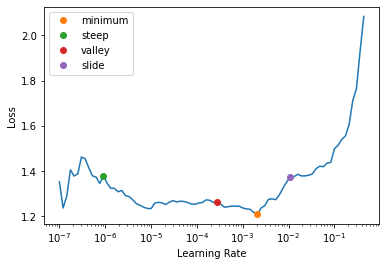

In [ ]:
learn = cnn_learner(dls, resnet50, # <- model
                    n_in=1,  # <- This is the only audio specific modification here
                    metrics=[accuracy, RocAucBinary(average='macro')],
                    cbs=(SaveModelCallback(monitor='accuracy', with_opt=True))
                   )

# Find Learning Rate
lrs = learn.lr_find(suggest_funcs=(minimum, steep, valley, slide))

# Run 
learn.fine_tune(50, lrs.valley)

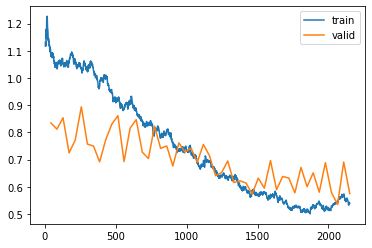

In [ ]:
learn.recorder.plot_loss()

0.7123287671232876 0.7004228183267485 0.6295983086680761 0.6555070354196992 0.6555070354196992 0.6226559510141599
^^    accuracy, rocauc, f1, recall, specificity, precision    ^^
              precision    recall  f1-score   support

           0       0.86      0.76      0.80       229
           1       0.38      0.56      0.45        63

    accuracy                           0.71       292
   macro avg       0.62      0.66      0.63       292
weighted avg       0.76      0.71      0.73       292



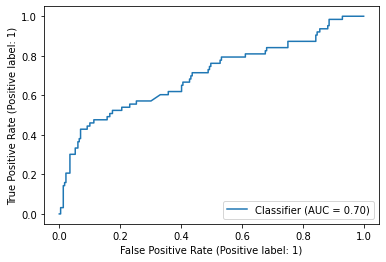

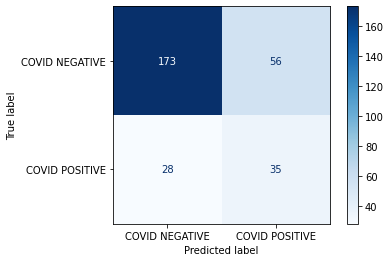

In [ ]:
xx = learn.load('/content/models/model')

pred_probas, actual_classes, pred_classes = xx.get_preds(dl=test_dl, with_decoded=True)

acc = accuracy_score(actual_classes, pred_classes)
rocauc = roc_auc_score(actual_classes, pred_probas[:, 1], average='macro')
fone= f1_score(actual_classes, pred_classes, average='macro')
rec = recall_score(actual_classes, pred_classes, average='macro')
prec = precision_score(actual_classes, pred_classes, average='macro')
spc = specificity_score(actual_classes, pred_classes, average='macro')


print(acc, rocauc, fone, rec, spc, prec)
print('^^    accuracy, rocauc, f1, recall, specificity, precision    ^^')

print(classification_report(actual_classes, pred_classes))       
RocCurveDisplay.from_predictions(actual_classes, pred_probas[:, 1])
plt.show()

ConfusionMatrixDisplay.from_predictions(actual_classes, pred_classes, 
                                        display_labels=test_dl.vocab,cmap=plt.cm.Blues)
plt.show()

### ResNet-101

epoch,train_loss,valid_loss,accuracy,roc_auc_score,time
0,1.259466,1.201038,0.600806,0.606289,00:24


Better model found at epoch 0 with accuracy value: 0.600806474685669.


epoch,train_loss,valid_loss,accuracy,roc_auc_score,time
0,1.101161,0.977688,0.625000,0.631205,00:25
1,1.084918,1.019088,0.633065,0.668118,00:25
2,1.034671,0.842312,0.629032,0.630044,00:25
3,0.973296,0.904574,0.629032,0.663087,00:25
4,0.937013,0.665358,0.689516,0.750024,00:25
5,0.946641,0.812408,0.629032,0.694194,00:25
6,0.932627,0.774729,0.685484,0.691630,00:25
7,0.935646,0.763050,0.689516,0.692743,00:25
8,0.914396,0.743037,0.693548,0.680552,00:25
9,0.874468,0.731774,0.689516,0.720900,00:25


Better model found at epoch 0 with accuracy value: 0.625.
Better model found at epoch 1 with accuracy value: 0.6330645084381104.
Better model found at epoch 4 with accuracy value: 0.6895161271095276.
Better model found at epoch 8 with accuracy value: 0.6935483813285828.
Better model found at epoch 13 with accuracy value: 0.7016128897666931.
Better model found at epoch 14 with accuracy value: 0.7217742204666138.
Better model found at epoch 17 with accuracy value: 0.75.
Better model found at epoch 25 with accuracy value: 0.7580645084381104.
Better model found at epoch 28 with accuracy value: 0.7782257795333862.
Better model found at epoch 31 with accuracy value: 0.7822580933570862.
Better model found at epoch 47 with accuracy value: 0.8064516186714172.


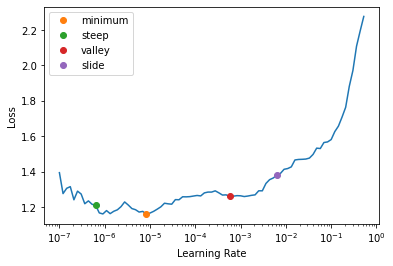

In [ ]:
learn = cnn_learner(dls, resnet101, # <- model
                    n_in=1,  # <- This is the only audio specific modification here
                    metrics=[accuracy, RocAucBinary(average='macro')],
                    cbs=(SaveModelCallback(monitor='accuracy', with_opt=True))
                   )

# Find Learning Rate
lrs = learn.lr_find(suggest_funcs=(minimum, steep, valley, slide))

# Run 
learn.fine_tune(50, lrs.valley)

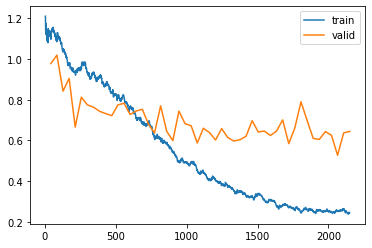

In [ ]:
learn.recorder.plot_loss()

0.821917808219178 0.8073057461703751 0.7427312775330397 0.7483884383447703 0.7483884383447703 0.7377114427860696
^^    accuracy, rocauc, f1, recall, specificity, precision    ^^
              precision    recall  f1-score   support

           0       0.89      0.88      0.89       229
           1       0.58      0.62      0.60        63

    accuracy                           0.82       292
   macro avg       0.74      0.75      0.74       292
weighted avg       0.83      0.82      0.82       292



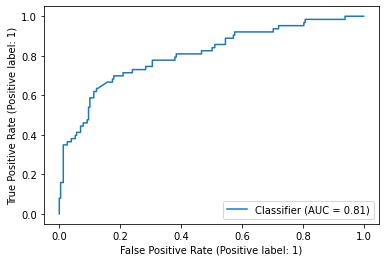

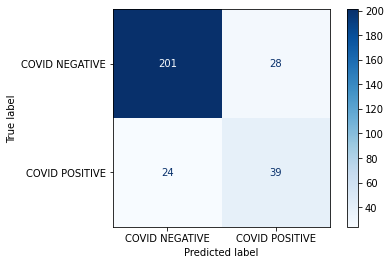

In [ ]:
xx = learn.load('/content/models/model')

pred_probas, actual_classes, pred_classes = xx.get_preds(dl=test_dl, with_decoded=True)

acc = accuracy_score(actual_classes, pred_classes)
rocauc = roc_auc_score(actual_classes, pred_probas[:, 1], average='macro')
fone= f1_score(actual_classes, pred_classes, average='macro')
rec = recall_score(actual_classes, pred_classes, average='macro')
prec = precision_score(actual_classes, pred_classes, average='macro')
spc = specificity_score(actual_classes, pred_classes, average='macro')


print(acc, rocauc, fone, rec, spc, prec)
print('^^    accuracy, rocauc, f1, recall, specificity, precision    ^^')

print(classification_report(actual_classes, pred_classes))       
RocCurveDisplay.from_predictions(actual_classes, pred_probas[:, 1])
plt.show()

ConfusionMatrixDisplay.from_predictions(actual_classes, pred_classes, 
                                        display_labels=test_dl.vocab,cmap=plt.cm.Blues)
plt.show()

### vgg16_bn

Downloading: "https://download.pytorch.org/models/vgg16_bn-6c64b313.pth" to /root/.cache/torch/hub/checkpoints/vgg16_bn-6c64b313.pth


  0%|          | 0.00/528M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,accuracy,roc_auc_score,time
0,1.175711,0.897230,0.516129,0.609240,00:24


Better model found at epoch 0 with accuracy value: 0.5161290168762207.


epoch,train_loss,valid_loss,accuracy,roc_auc_score,time
0,1.035276,0.834687,0.556452,0.638655,00:24
1,0.989278,0.845911,0.564516,0.575278,00:24
2,0.977381,0.847870,0.560484,0.661393,00:24
3,0.972250,0.830615,0.592742,0.650701,00:24
4,0.962434,0.756209,0.625000,0.710547,00:24
5,0.971012,0.791444,0.616935,0.638075,00:24
6,0.952200,0.701142,0.657258,0.713111,00:24
7,0.930540,0.748113,0.625000,0.676343,00:24
8,0.898192,0.740712,0.645161,0.690518,00:24
9,0.864938,0.765894,0.629032,0.678278,00:24


Better model found at epoch 0 with accuracy value: 0.5564516186714172.
Better model found at epoch 1 with accuracy value: 0.5645161271095276.
Better model found at epoch 3 with accuracy value: 0.5927419066429138.
Better model found at epoch 4 with accuracy value: 0.625.
Better model found at epoch 6 with accuracy value: 0.6572580933570862.
Better model found at epoch 17 with accuracy value: 0.6653226017951965.
Better model found at epoch 18 with accuracy value: 0.6935483813285828.
Better model found at epoch 21 with accuracy value: 0.7096773982048035.
Better model found at epoch 23 with accuracy value: 0.7217742204666138.
Better model found at epoch 24 with accuracy value: 0.75.
Better model found at epoch 33 with accuracy value: 0.7620967626571655.
Better model found at epoch 35 with accuracy value: 0.7782257795333862.
Better model found at epoch 44 with accuracy value: 0.7822580933570862.


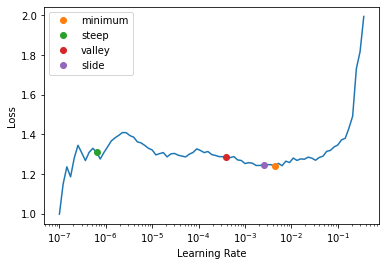

In [ ]:
learn = cnn_learner(dls, vgg16_bn, # <- model
                    n_in=1,  # <- This is the only audio specific modification here
                    metrics=[accuracy, RocAucBinary(average='macro')],
                    cbs=(SaveModelCallback(monitor='accuracy', with_opt=True))
                   )

# Find Learning Rate
lrs = learn.lr_find(suggest_funcs=(minimum, steep, valley, slide))

# Run 
learn.fine_tune(50, lrs.valley)

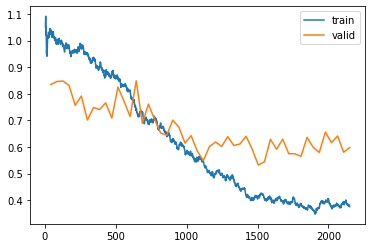

In [ ]:
learn.recorder.plot_loss()

0.75 0.7770846329798295 0.6681766528121547 0.6910307063145491 0.6910307063145491 0.6577380952380952
^^    accuracy, rocauc, f1, recall, specificity, precision    ^^
              precision    recall  f1-score   support

           0       0.88      0.79      0.83       229
           1       0.44      0.59      0.50        63

    accuracy                           0.75       292
   macro avg       0.66      0.69      0.67       292
weighted avg       0.78      0.75      0.76       292



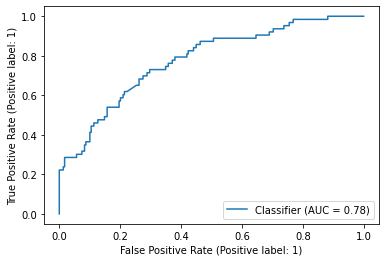

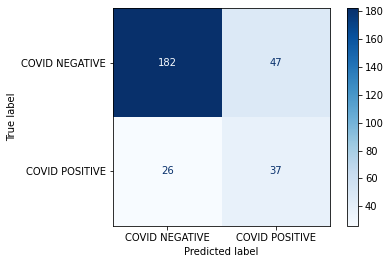

In [ ]:
xx = learn.load('/content/models/model')

pred_probas, actual_classes, pred_classes = xx.get_preds(dl=test_dl, with_decoded=True)

acc = accuracy_score(actual_classes, pred_classes)
rocauc = roc_auc_score(actual_classes, pred_probas[:, 1], average='macro')
fone= f1_score(actual_classes, pred_classes, average='macro')
rec = recall_score(actual_classes, pred_classes, average='macro')
prec = precision_score(actual_classes, pred_classes, average='macro')
spc = specificity_score(actual_classes, pred_classes, average='macro')


print(acc, rocauc, fone, rec, spc, prec)
print('^^    accuracy, rocauc, f1, recall, specificity, precision    ^^')

print(classification_report(actual_classes, pred_classes))       
RocCurveDisplay.from_predictions(actual_classes, pred_probas[:, 1])
plt.show()

ConfusionMatrixDisplay.from_predictions(actual_classes, pred_classes, 
                                        display_labels=test_dl.vocab,cmap=plt.cm.Blues)
plt.show()

### vgg19_bn

Downloading: "https://download.pytorch.org/models/vgg19_bn-c79401a0.pth" to /root/.cache/torch/hub/checkpoints/vgg19_bn-c79401a0.pth


  0%|          | 0.00/548M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,accuracy,roc_auc_score,time
0,1.119446,0.861362,0.697581,0.626657,00:24


Better model found at epoch 0 with accuracy value: 0.6975806355476379.


epoch,train_loss,valid_loss,accuracy,roc_auc_score,time
0,1.106212,0.843120,0.564516,0.634978,00:24
1,1.031384,0.748992,0.608871,0.660281,00:25
2,1.005358,0.696835,0.661290,0.680697,00:25
3,1.013220,0.764817,0.612903,0.641896,00:24
4,0.983862,0.690460,0.697581,0.705128,00:25
5,0.954317,0.720937,0.673387,0.716981,00:24
6,0.857350,0.693032,0.661290,0.691485,00:24
7,0.823607,0.691503,0.725806,0.751379,00:24
8,0.817210,0.702925,0.657258,0.679052,00:24
9,0.789209,0.731217,0.653226,0.685196,00:25


Better model found at epoch 0 with accuracy value: 0.5645161271095276.
Better model found at epoch 1 with accuracy value: 0.6088709831237793.
Better model found at epoch 2 with accuracy value: 0.6612903475761414.
Better model found at epoch 4 with accuracy value: 0.6975806355476379.
Better model found at epoch 7 with accuracy value: 0.725806474685669.
Better model found at epoch 15 with accuracy value: 0.7298387289047241.
Better model found at epoch 16 with accuracy value: 0.7540322542190552.
Better model found at epoch 19 with accuracy value: 0.7661290168762207.
Better model found at epoch 20 with accuracy value: 0.7782257795333862.
Better model found at epoch 24 with accuracy value: 0.7943548560142517.
Better model found at epoch 29 with accuracy value: 0.8145161271095276.


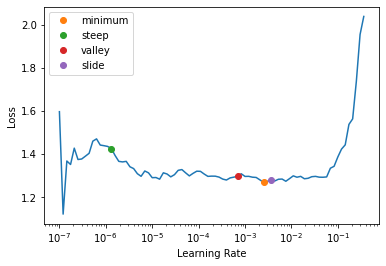

In [ ]:
learn = cnn_learner(dls, vgg19_bn, # <- model
                    n_in=1,  # <- This is the only audio specific modification here
                    metrics=[accuracy, RocAucBinary(average='macro')],
                    cbs=(SaveModelCallback(monitor='accuracy', with_opt=True))
                   )

# Find Learning Rate
lrs = learn.lr_find(suggest_funcs=(minimum, steep, valley, slide))

# Run 
learn.fine_tune(50, lrs.valley)

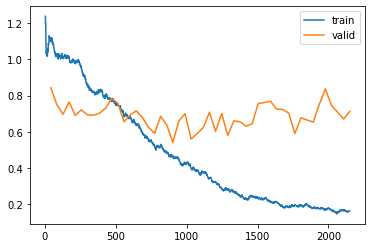

In [ ]:
learn.recorder.plot_loss()

0.7945205479452054 0.8021071601857628 0.7153441216611425 0.7309211894364733 0.7309211894364733 0.7047004608294931
^^    accuracy, rocauc, f1, recall, specificity, precision    ^^
              precision    recall  f1-score   support

           0       0.89      0.84      0.87       229
           1       0.52      0.62      0.57        63

    accuracy                           0.79       292
   macro avg       0.70      0.73      0.72       292
weighted avg       0.81      0.79      0.80       292



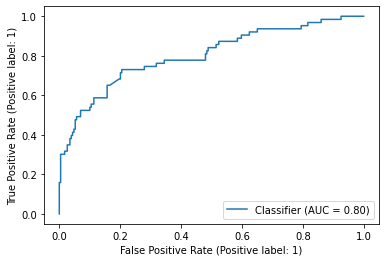

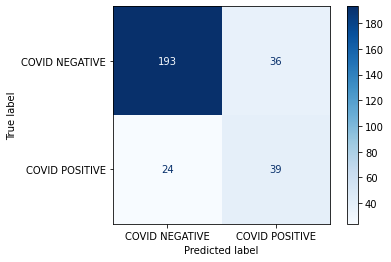

In [ ]:
xx = learn.load('/content/models/model')

pred_probas, actual_classes, pred_classes = xx.get_preds(dl=test_dl, with_decoded=True)

acc = accuracy_score(actual_classes, pred_classes)
rocauc = roc_auc_score(actual_classes, pred_probas[:, 1], average='macro')
fone= f1_score(actual_classes, pred_classes, average='macro')
rec = recall_score(actual_classes, pred_classes, average='macro')
prec = precision_score(actual_classes, pred_classes, average='macro')
spc = specificity_score(actual_classes, pred_classes, average='macro')


print(acc, rocauc, fone, rec, spc, prec)
print('^^    accuracy, rocauc, f1, recall, specificity, precision    ^^')

print(classification_report(actual_classes, pred_classes))       
RocCurveDisplay.from_predictions(actual_classes, pred_probas[:, 1])
plt.show()

ConfusionMatrixDisplay.from_predictions(actual_classes, pred_classes, 
                                        display_labels=test_dl.vocab,cmap=plt.cm.Blues)
plt.show()

### alexnet

Downloading: "https://download.pytorch.org/models/alexnet-owt-4df8aa71.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-4df8aa71.pth


  0%|          | 0.00/233M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,accuracy,roc_auc_score,time
0,1.277278,1.170595,0.556452,0.584422,00:22


Better model found at epoch 0 with accuracy value: 0.5564516186714172.


epoch,train_loss,valid_loss,accuracy,roc_auc_score,time
0,1.256912,0.853033,0.568548,0.535752,00:22
1,1.243445,2.533125,0.564516,0.545090,00:23
2,1.259252,1.096599,0.536290,0.483116,00:22
3,1.257475,0.887269,0.576613,0.545283,00:23
4,1.204359,0.921877,0.588710,0.498549,00:22
5,1.216437,2.086242,0.596774,0.549540,00:23
6,1.239544,0.978072,0.548387,0.517513,00:23
7,1.228881,0.905451,0.516129,0.493614,00:23
8,1.289189,0.932041,0.568548,0.539865,00:22
9,1.256212,1.009406,0.604839,0.559023,00:22


Better model found at epoch 0 with accuracy value: 0.5685483813285828.
Better model found at epoch 3 with accuracy value: 0.5766128897666931.
Better model found at epoch 4 with accuracy value: 0.5887096524238586.
Better model found at epoch 5 with accuracy value: 0.5967742204666138.
Better model found at epoch 9 with accuracy value: 0.6048387289047241.
Better model found at epoch 10 with accuracy value: 0.649193525314331.


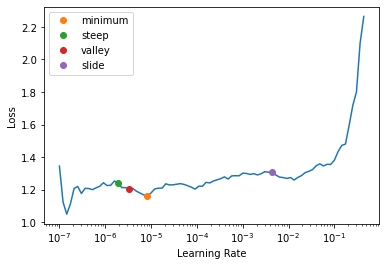

In [ ]:
learn = cnn_learner(dls, alexnet, # <- model
                    n_in=1,  # <- This is the only audio specific modification here
                    metrics=[accuracy, RocAucBinary(average='macro')],
                    cbs=(SaveModelCallback(monitor='accuracy', with_opt=True))
                   )

# Find Learning Rate
lrs = learn.lr_find(suggest_funcs=(minimum, steep, valley, slide))

# Run 
learn.fine_tune(50, lrs.valley)

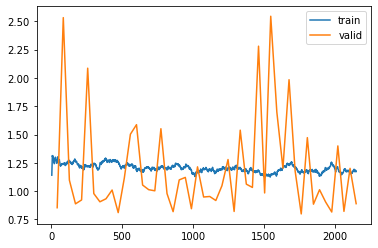

In [ ]:
learn.recorder.plot_loss()

0.5547945205479452 0.5170860192694253 0.4842391304347826 0.5090455396132252 0.5090455396132252 0.5063070900391474
^^    accuracy, rocauc, f1, recall, specificity, precision    ^^
              precision    recall  f1-score   support

           0       0.79      0.59      0.68       229
           1       0.22      0.43      0.29        63

    accuracy                           0.55       292
   macro avg       0.51      0.51      0.48       292
weighted avg       0.67      0.55      0.59       292



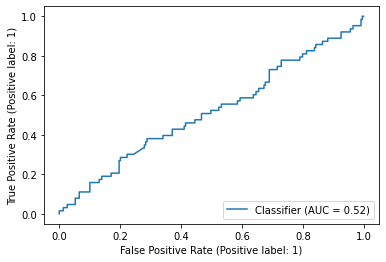

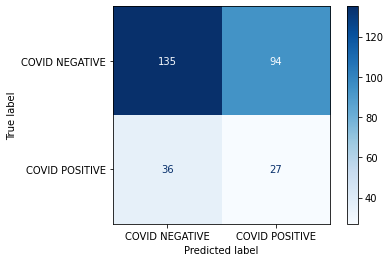

In [ ]:
xx = learn.load('/content/models/model')

pred_probas, actual_classes, pred_classes = xx.get_preds(dl=test_dl, with_decoded=True)

acc = accuracy_score(actual_classes, pred_classes)
rocauc = roc_auc_score(actual_classes, pred_probas[:, 1], average='macro')
fone= f1_score(actual_classes, pred_classes, average='macro')
rec = recall_score(actual_classes, pred_classes, average='macro')
prec = precision_score(actual_classes, pred_classes, average='macro')
spc = specificity_score(actual_classes, pred_classes, average='macro')


print(acc, rocauc, fone, rec, spc, prec)
print('^^    accuracy, rocauc, f1, recall, specificity, precision    ^^')

print(classification_report(actual_classes, pred_classes))       
RocCurveDisplay.from_predictions(actual_classes, pred_probas[:, 1])
plt.show()

ConfusionMatrixDisplay.from_predictions(actual_classes, pred_classes, 
                                        display_labels=test_dl.vocab,cmap=plt.cm.Blues)
plt.show()

### squeezenet1_0

Downloading: "https://download.pytorch.org/models/squeezenet1_0-a815701f.pth" to /root/.cache/torch/hub/checkpoints/squeezenet1_0-a815701f.pth


  0%|          | 0.00/4.79M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,accuracy,roc_auc_score,time
0,1.195235,1.525760,0.524194,0.513401,00:22


Better model found at epoch 0 with accuracy value: 0.524193525314331.


epoch,train_loss,valid_loss,accuracy,roc_auc_score,time
0,1.155036,1.357442,0.431452,0.493807,00:22
1,1.083170,0.976524,0.588710,0.600919,00:23
2,1.075338,2.256309,0.604839,0.687712,00:22
3,1.084435,5.725262,0.487903,0.614901,00:22
4,1.091377,1.861650,0.548387,0.632172,00:22
5,1.049579,1.058095,0.568548,0.644557,00:22
6,1.020672,1.267591,0.552419,0.543106,00:22
7,0.975401,1.183759,0.572581,0.685680,00:23
8,0.975337,2.017593,0.604839,0.626076,00:22
9,0.978997,1.590032,0.588710,0.633914,00:22


Better model found at epoch 0 with accuracy value: 0.43145161867141724.
Better model found at epoch 1 with accuracy value: 0.5887096524238586.
Better model found at epoch 2 with accuracy value: 0.6048387289047241.
Better model found at epoch 10 with accuracy value: 0.6290322542190552.
Better model found at epoch 20 with accuracy value: 0.6774193644523621.
Better model found at epoch 28 with accuracy value: 0.6854838728904724.


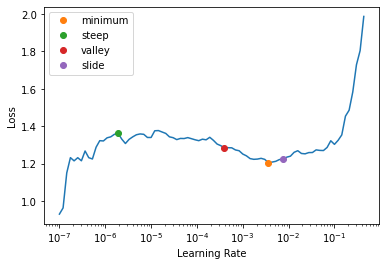

In [ ]:
learn = cnn_learner(dls, squeezenet1_0, # <- model
                    n_in=1,  # <- This is the only audio specific modification here
                    metrics=[accuracy, RocAucBinary(average='macro')],
                    cbs=(SaveModelCallback(monitor='accuracy', with_opt=True))
                   )

# Find Learning Rate
lrs = learn.lr_find(suggest_funcs=(minimum, steep, valley, slide))

# Run 
learn.fine_tune(50, lrs.valley)

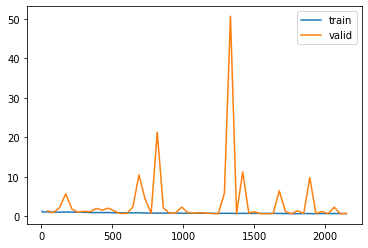

In [ ]:
learn.recorder.plot_loss()

0.6678082191780822 0.6615720524017468 0.5989408549622643 0.6386289595896584 0.6386289595896584 0.6006441223832528
^^    accuracy, rocauc, f1, recall, specificity, precision    ^^
              precision    recall  f1-score   support

           0       0.86      0.69      0.77       229
           1       0.34      0.59      0.43        63

    accuracy                           0.67       292
   macro avg       0.60      0.64      0.60       292
weighted avg       0.75      0.67      0.69       292



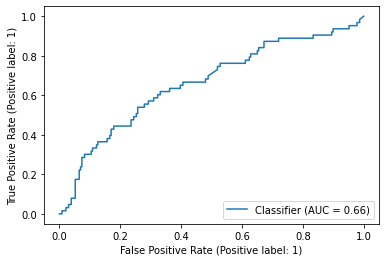

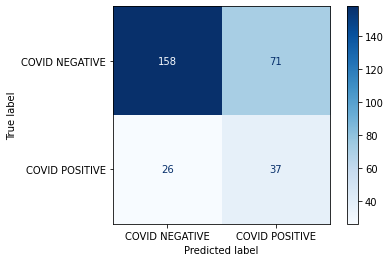

In [ ]:
xx = learn.load('/content/models/model')

pred_probas, actual_classes, pred_classes = xx.get_preds(dl=test_dl, with_decoded=True)

acc = accuracy_score(actual_classes, pred_classes)
rocauc = roc_auc_score(actual_classes, pred_probas[:, 1], average='macro')
fone= f1_score(actual_classes, pred_classes, average='macro')
rec = recall_score(actual_classes, pred_classes, average='macro')
prec = precision_score(actual_classes, pred_classes, average='macro')
spc = specificity_score(actual_classes, pred_classes, average='macro')


print(acc, rocauc, fone, rec, spc, prec)
print('^^    accuracy, rocauc, f1, recall, specificity, precision    ^^')

print(classification_report(actual_classes, pred_classes))       
RocCurveDisplay.from_predictions(actual_classes, pred_probas[:, 1])
plt.show()

ConfusionMatrixDisplay.from_predictions(actual_classes, pred_classes, 
                                        display_labels=test_dl.vocab,cmap=plt.cm.Blues)
plt.show()

### densenet121

Downloading: "https://download.pytorch.org/models/densenet121-a639ec97.pth" to /root/.cache/torch/hub/checkpoints/densenet121-a639ec97.pth


  0%|          | 0.00/30.8M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,accuracy,roc_auc_score,time
0,1.266397,0.761198,0.608871,0.562022,00:25


Better model found at epoch 0 with accuracy value: 0.6088709831237793.


epoch,train_loss,valid_loss,accuracy,roc_auc_score,time
0,1.153064,0.735272,0.620968,0.664780,00:26
1,1.099253,0.716171,0.620968,0.673004,00:26
2,1.013658,0.853421,0.584677,0.681713,00:26
3,0.969094,0.823228,0.616935,0.607547,00:26
4,0.958633,0.684370,0.649194,0.663619,00:26
5,0.894138,0.702232,0.673387,0.709289,00:26
6,0.892855,0.761073,0.604839,0.646493,00:26
7,0.914259,0.853377,0.641129,0.624770,00:26
8,0.899391,0.703621,0.653226,0.680745,00:26
9,0.869008,0.677512,0.677419,0.658200,00:26


Better model found at epoch 0 with accuracy value: 0.6209677457809448.
Better model found at epoch 4 with accuracy value: 0.649193525314331.
Better model found at epoch 5 with accuracy value: 0.6733871102333069.
Better model found at epoch 9 with accuracy value: 0.6774193644523621.
Better model found at epoch 12 with accuracy value: 0.7096773982048035.
Better model found at epoch 16 with accuracy value: 0.725806474685669.
Better model found at epoch 21 with accuracy value: 0.7419354915618896.
Better model found at epoch 26 with accuracy value: 0.7822580933570862.
Better model found at epoch 35 with accuracy value: 0.7903226017951965.


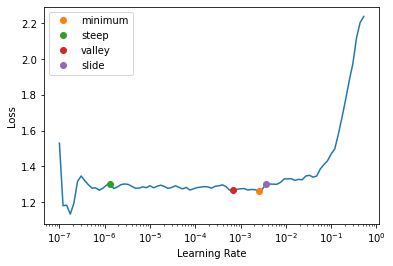

In [ ]:
learn = cnn_learner(dls, densenet121, # <- model
                    n_in=1,  # <- This is the only audio specific modification here
                    metrics=[accuracy, RocAucBinary(average='macro')],
                    cbs=(SaveModelCallback(monitor='accuracy', with_opt=True))
                   )

# Find Learning Rate
lrs = learn.lr_find(suggest_funcs=(minimum, steep, valley, slide))

# Run 
learn.fine_tune(50, lrs.valley)

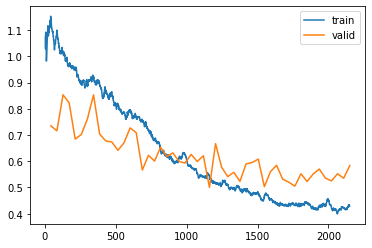

In [ ]:
learn.recorder.plot_loss()

0.7705479452054794 0.7833922506411589 0.7007784898215133 0.7328966521106259 0.7328966521106259 0.6871657754010696
^^    accuracy, rocauc, f1, recall, specificity, precision    ^^
              precision    recall  f1-score   support

           0       0.90      0.80      0.85       229
           1       0.48      0.67      0.56        63

    accuracy                           0.77       292
   macro avg       0.69      0.73      0.70       292
weighted avg       0.81      0.77      0.78       292



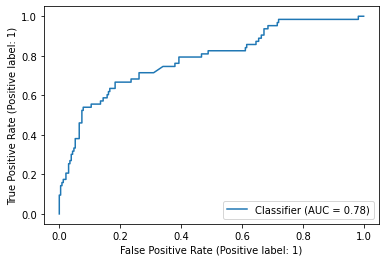

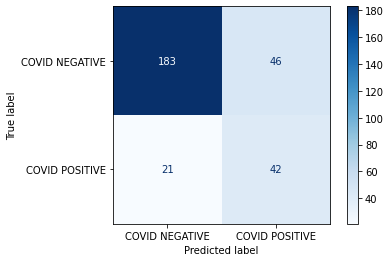

In [ ]:
xx = learn.load('/content/models/model')

pred_probas, actual_classes, pred_classes = xx.get_preds(dl=test_dl, with_decoded=True)

acc = accuracy_score(actual_classes, pred_classes)
rocauc = roc_auc_score(actual_classes, pred_probas[:, 1], average='macro')
fone= f1_score(actual_classes, pred_classes, average='macro')
rec = recall_score(actual_classes, pred_classes, average='macro')
prec = precision_score(actual_classes, pred_classes, average='macro')
spc = specificity_score(actual_classes, pred_classes, average='macro')


print(acc, rocauc, fone, rec, spc, prec)
print('^^    accuracy, rocauc, f1, recall, specificity, precision    ^^')

print(classification_report(actual_classes, pred_classes))       
RocCurveDisplay.from_predictions(actual_classes, pred_probas[:, 1])
plt.show()

ConfusionMatrixDisplay.from_predictions(actual_classes, pred_classes, 
                                        display_labels=test_dl.vocab,cmap=plt.cm.Blues)
plt.show()

### xresnet50

Downloading: "https://s3.amazonaws.com/fast-ai-modelzoo/xrn50_940.pth" to /root/.cache/torch/hub/checkpoints/xrn50_940.pth


  0%|          | 0.00/244M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,accuracy,roc_auc_score,time
0,1.199356,0.727145,0.596774,0.621384,04:59


Better model found at epoch 0 with accuracy value: 0.5967742204666138.


epoch,train_loss,valid_loss,accuracy,roc_auc_score,time
0,1.062585,0.747586,0.592742,0.657716,05:29
1,1.053662,0.742960,0.600806,0.718142,05:36
2,1.058655,0.748054,0.604839,0.652104,05:39
3,1.036488,0.745781,0.604839,0.710305,05:32
4,1.052962,0.812464,0.584677,0.654475,05:36
5,1.036029,0.662843,0.604839,0.683212,05:37
6,1.000224,0.781871,0.608871,0.692211,05:42
7,0.966558,0.673686,0.649194,0.730866,05:37
8,0.964336,0.736729,0.604839,0.695356,05:38
9,0.940788,0.667905,0.637097,0.711466,05:36


Better model found at epoch 0 with accuracy value: 0.5927419066429138.
Better model found at epoch 1 with accuracy value: 0.600806474685669.
Better model found at epoch 2 with accuracy value: 0.6048387289047241.
Better model found at epoch 6 with accuracy value: 0.6088709831237793.
Better model found at epoch 7 with accuracy value: 0.649193525314331.
Better model found at epoch 12 with accuracy value: 0.6653226017951965.
Better model found at epoch 13 with accuracy value: 0.6774193644523621.
Better model found at epoch 18 with accuracy value: 0.6854838728904724.
Better model found at epoch 26 with accuracy value: 0.6935483813285828.
Better model found at epoch 27 with accuracy value: 0.7379032373428345.


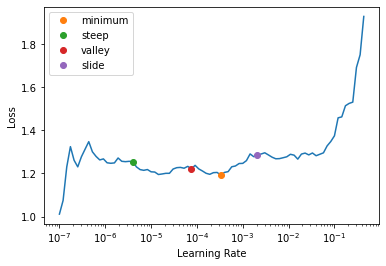

In [ ]:
learn = cnn_learner(dls, xresnet50, # <- model
                    n_in=1,  # <- This is the only audio specific modification here
                    metrics=[accuracy, RocAucBinary(average='macro')],
                    cbs=(SaveModelCallback(monitor='accuracy', with_opt=True))
                   )

# Find Learning Rate
lrs = learn.lr_find(suggest_funcs=(minimum, steep, valley, slide))

# Run 
learn.fine_tune(50, lrs.valley)

In [ ]:
learn.recorder.plot_loss()

0.6917808219178082 0.7471407777084633 0.6265984654731458 0.6711721078533306 0.6711721078533306 0.6247537256883051
^^    accuracy, rocauc, f1, recall, specificity, precision    ^^
              precision    recall  f1-score   support

           0       0.88      0.71      0.78       229
           1       0.37      0.63      0.47        63

    accuracy                           0.69       292
   macro avg       0.62      0.67      0.63       292
weighted avg       0.77      0.69      0.72       292



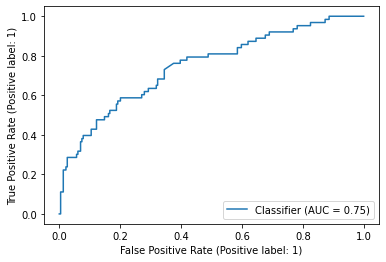

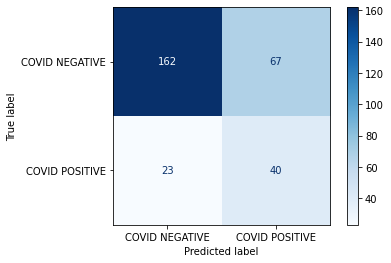

In [ ]:
xx = learn.load('/content/models/model')

pred_probas, actual_classes, pred_classes = xx.get_preds(dl=test_dl, with_decoded=True)

acc = accuracy_score(actual_classes, pred_classes)
rocauc = roc_auc_score(actual_classes, pred_probas[:, 1], average='macro')
fone= f1_score(actual_classes, pred_classes, average='macro')
rec = recall_score(actual_classes, pred_classes, average='macro')
prec = precision_score(actual_classes, pred_classes, average='macro')
spc = specificity_score(actual_classes, pred_classes, average='macro')


print(acc, rocauc, fone, rec, spc, prec)
print('^^    accuracy, rocauc, f1, recall, specificity, precision    ^^')

print(classification_report(actual_classes, pred_classes))       
RocCurveDisplay.from_predictions(actual_classes, pred_probas[:, 1])
plt.show()

ConfusionMatrixDisplay.from_predictions(actual_classes, pred_classes, 
                                        display_labels=test_dl.vocab,cmap=plt.cm.Blues)
plt.show()